In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [83]:
import numpy as np

In [3]:
from pandas_datareader import data

In [4]:
from datetime import datetime

In [5]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [6]:
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)

In [11]:
for stock in tech_list:
    globals()[stock] = data.DataReader(stock, 'yahoo', start, end)

In [12]:
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-08-26,149.119995,147.509995,148.350006,147.539993,48597200.0,146.717865
2021-08-27,148.750000,146.830002,147.479996,148.600006,55802400.0,147.771957
2021-08-30,153.490005,148.610001,149.000000,153.119995,90956700.0,152.266754
2021-08-31,152.800003,151.289993,152.660004,151.830002,86453100.0,150.983963
2021-09-01,154.979996,152.339996,152.830002,152.509995,80313700.0,151.660156
...,...,...,...,...,...,...
2022-08-19,173.740005,171.309998,173.029999,171.520004,70211500.0,171.520004
2022-08-22,169.860001,167.139999,169.690002,167.570007,69026800.0,167.570007
2022-08-23,168.710007,166.649994,167.080002,167.229996,54147100.0,167.229996


In [13]:
GOOG

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-08-26,143.134796,142.091507,142.618500,142.123001,14922000.0,142.123001
2021-08-27,145.011002,142.020004,142.112503,144.550507,24562000.0,144.550507
2021-08-30,146.489502,144.600006,144.704498,145.469498,16916000.0,145.469498
2021-08-31,146.112000,145.000000,145.884506,145.462006,26756000.0,145.462006
2021-09-01,146.820496,145.614502,145.649994,145.841995,15824000.0,145.841995
...,...,...,...,...,...,...
2022-08-19,120.000000,117.669998,119.870003,118.120003,20171100.0,118.120003
2022-08-22,116.500000,114.669998,116.099998,115.070000,19316000.0,115.070000
2022-08-23,115.930000,114.300003,114.320000,114.769997,14390700.0,114.769997


In [14]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,159.875952,156.078293,157.863135,158.078969,8.799195e+07,157.577717
std,12.683663,12.554286,12.672126,12.615534,2.658718e+07,12.586039
min,132.389999,129.039993,130.070007,130.059998,4.100000e+07,129.879593
25%,149.319996,146.515003,147.897499,148.079998,6.909820e+07,147.643688
50%,160.855003,155.590004,158.675003,157.915001,8.248645e+07,157.364441
75%,171.049995,167.220001,169.080002,168.970005,1.002058e+08,168.630119
max,182.940002,179.119995,182.630005,182.009995,1.954327e+08,181.259918


In [15]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-08-26 to 2022-08-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


<AxesSubplot:xlabel='Date'>

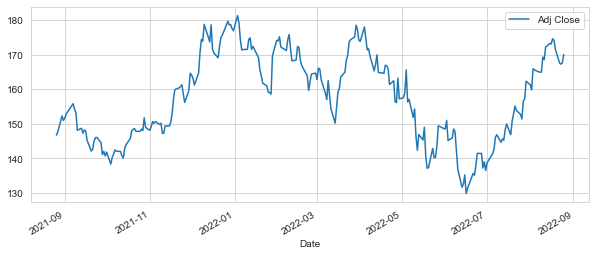

In [17]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

<AxesSubplot:xlabel='Date'>

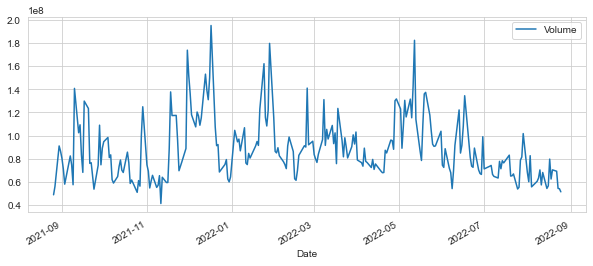

In [18]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [42]:
ma_day = [10, 20, 50]

In [44]:
for ma in ma_day:
    column_name = "MA for %s day" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma).mean()

<AxesSubplot:xlabel='Date'>

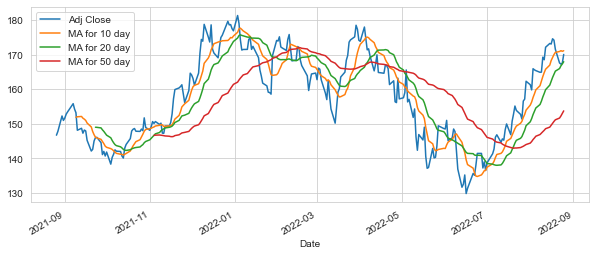

In [46]:
AAPL[['Adj Close', 'MA for 10 day', 'MA for 20 day', 'MA for 50 day']].plot(subplots=False, figsize=(10,4))

<AxesSubplot:xlabel='Date'>

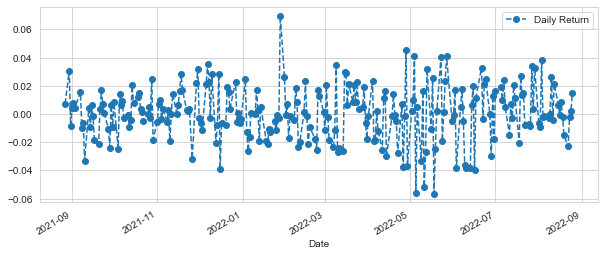

In [48]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(legend=True, figsize=(10,4), linestyle='--', marker='o')

C:\Users\moham\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

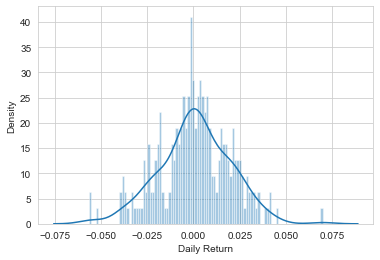

In [56]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100)

In [59]:
closing_df = data.DataReader(tech_list, 'yahoo', start, end)['Adj Close']

In [61]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-08-26,146.717850,142.123001,296.605865,165.800003
2021-08-27,147.771942,144.550507,297.230682,167.481506
2021-08-30,152.266769,145.469498,301.068542,171.078506
2021-08-31,150.983963,145.462006,299.372772,173.539505
2021-09-01,151.660141,145.841995,299.323120,173.949997


In [63]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-08-26,NaN,NaN,NaN,NaN
2021-08-27,0.007184,0.017080,0.002107,0.010142
2021-08-30,0.030417,0.006358,0.012912,0.021477
2021-08-31,-0.008425,-0.000052,-0.005633,0.014385
2021-09-01,0.004478,0.002612,-0.000166,0.002365


C:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


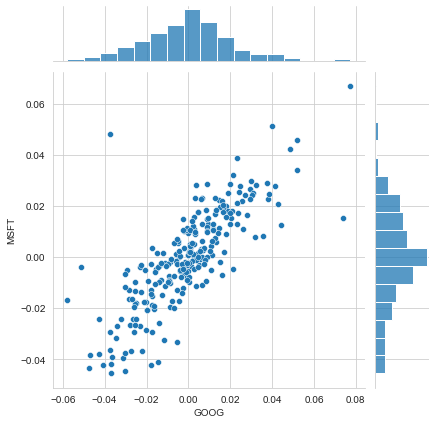

In [64]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')

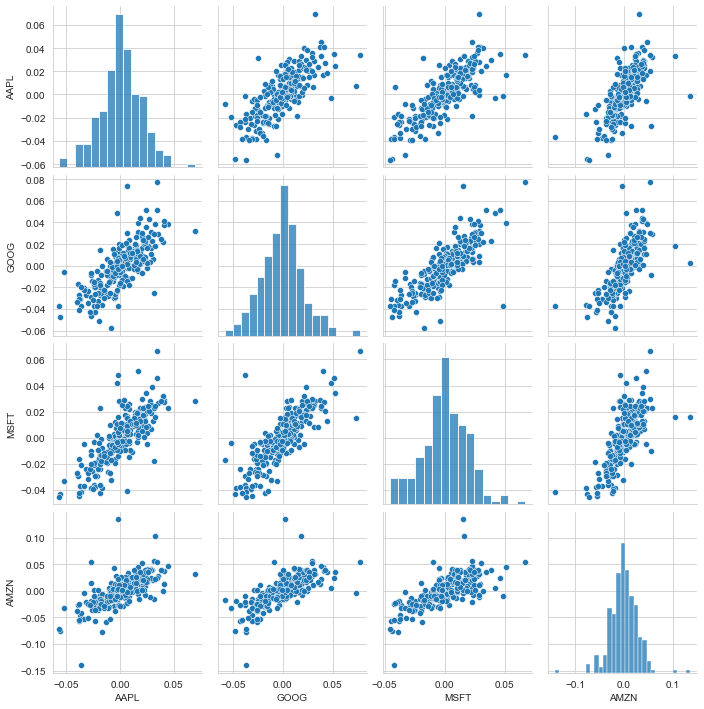

In [65]:
sns.pairplot(tech_rets.dropna())

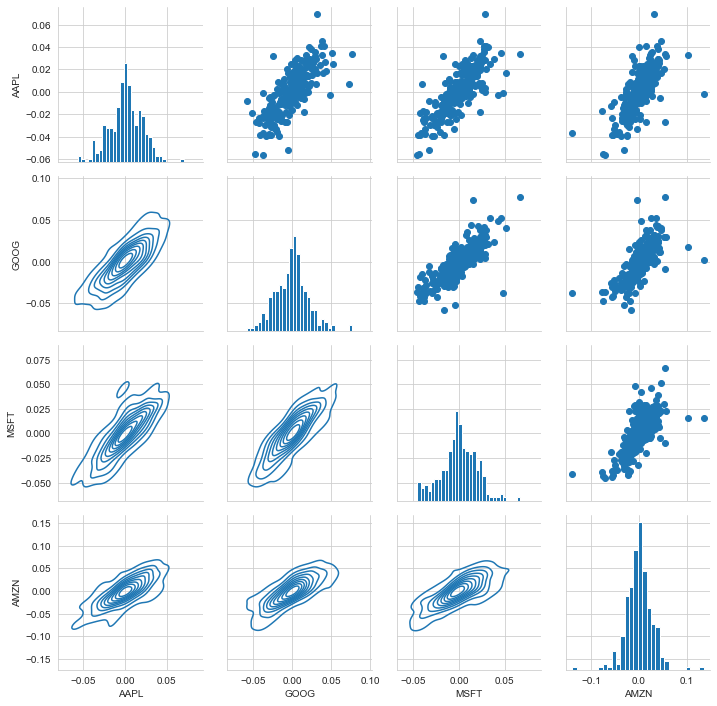

In [70]:
return_fig = sns.PairGrid(tech_rets.dropna())
return_fig.map_upper(plt.scatter)
return_fig.map_lower(sns.kdeplot)
return_fig.map_diag(plt.hist, bins=30)

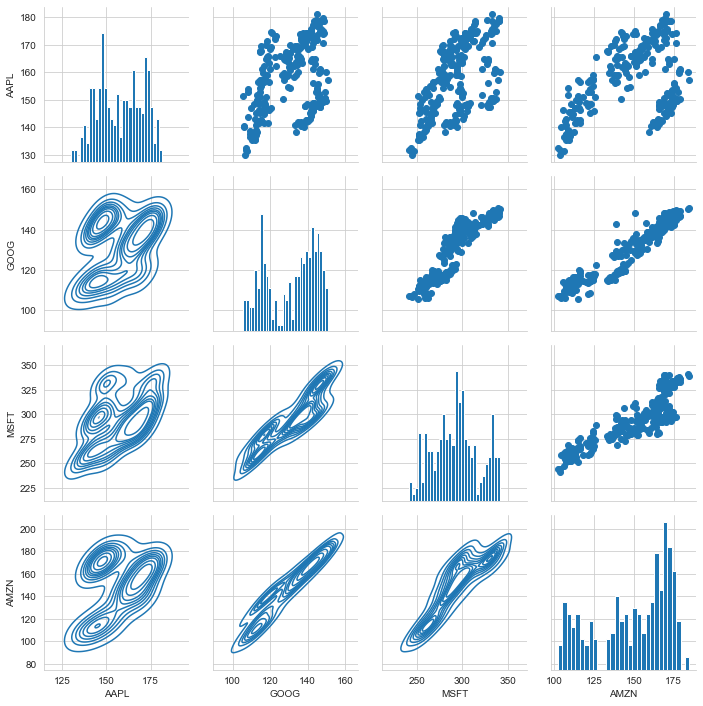

In [71]:
return_fig = sns.PairGrid(closing_df)
return_fig.map_upper(plt.scatter)
return_fig.map_lower(sns.kdeplot)
return_fig.map_diag(plt.hist, bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Date'>

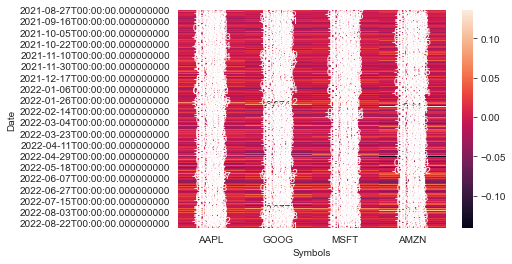

In [80]:
sns.heatmap(tech_rets.dropna(), annot=True)

In [81]:
rets = tech_rets.dropna()

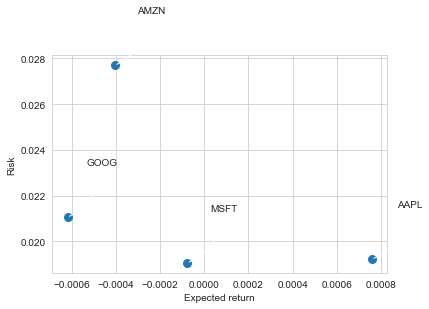

In [92]:
area = np.pi*20
plt.scatter(rets.mean(), rets.std(), s = area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
    label, xy = (x, y), xytext = (50,50),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3, rad=-0.3'))

In [93]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-08-27,0.007184,0.017080,0.002107,0.010142
2021-08-30,0.030417,0.006358,0.012912,0.021477
2021-08-31,-0.008425,-0.000052,-0.005633,0.014385
2021-09-01,0.004478,0.002612,-0.000166,0.002365
2021-09-02,0.007475,-0.011128,-0.002253,-0.004564


In [94]:
rets['AAPL'].quantile(0.05)


-0.032319023313971094

In [111]:
days = 365
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [164]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        shock[x] = np.random.normal(loc= mu*dt, scale= sigma*np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    return price

In [100]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-08-26,143.134796,142.091507,142.618500,142.123001,14922000.0,142.123001
2021-08-27,145.011002,142.020004,142.112503,144.550507,24562000.0,144.550507
2021-08-30,146.489502,144.600006,144.704498,145.469498,16916000.0,145.469498
2021-08-31,146.112000,145.000000,145.884506,145.462006,26756000.0,145.462006
2021-09-01,146.820496,145.614502,145.649994,145.841995,15824000.0,145.841995


Text(0.5, 1.0, 'Monte carlo analysis for google')

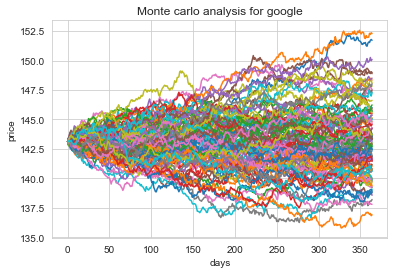

In [167]:
start_price = 143.134796
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel('days')
plt.ylabel('price')
plt.title('Monte carlo analysis for google')

In [169]:
runs = 10000
simulation = np.zeros(runs)
for run in range(runs):
    simulation[run] =  stock_monte_carlo(start_price, days, mu, sigma)[days-1]

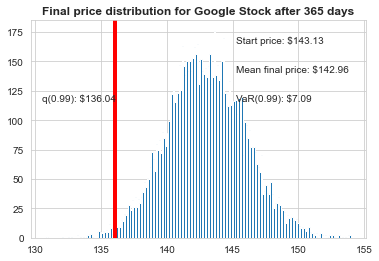

In [172]:
q = np.percentile(simulation, 1)
    
plt.hist(simulation,bins=200)
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulation.mean())
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)
plt.axvline(x=q, linewidth=4, color='r')
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');